<img src="./notebooks_img/coruai.gif">
  
## Perceptrón

El modelo biológico más simple de un perceptrón es una neurona y viceversa. Es decir, el modelo matemático más simple de una neurona es un perceptrón. La neurona es una célula especializada y caracterizada por poseer una cantidad indefinida de canales de entrada llamados dendritas y un canal de salida llamado axón. Las dendritas operan como sensores que recogen información de la región donde se hallan y la derivan hacia el cuerpo de la neurona que reacciona mediante una sinapsis que envía una respuesta hacia el cerebro, esto en el caso de los seres vivos.

Una neurona sola y aislada carece de razón de ser. Su labor especializada se torna valiosa en la medida en que se asocia a otras neuronas, formando una red. Normalmente, el axón de una neurona entrega su información como "señal de entrada" a una dendrita de otra neurona y así sucesivamente. El perceptrón que capta la señal en adelante se extiende formando una red de neuronas, sean éstas biológicas o de sustrato semiconductor (compuertas lógicas).

El perceptrón usa una matriz para representar las redes neuronales y es un discriminador terciario. 

<img src="http://cs231n.github.io/assets/nn1/neuron.png" width=480>

La imagen de la neurona biológica tiene su análoga digital.

<img src="http://cs231n.github.io/assets/nn1/neuron_model.jpeg" width=480>

<a href="https://es.wikipedia.org/wiki/Perceptr%C3%B3n">Wikepedia</a> - <a href="http://cs231n.github.io/neural-networks-1/">Standford class CS231m</a>

## Perceptro "a pelo"

En esta primera parte no vamos a usar TF. Vamos veremos las partes importantes a la hora de construir el modelo más básico posible. 

- Importar liberías
- Crear la parametrización del modelo
- Preparar los datos de entrada
- Implementar la forma del modelo
- Iterar
- Analizar resultados

Con Numpy tendremos más que suficiente para hacer las operaciones básicas del perceptrón que tenemos en el diseño de arriba.

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Configuración del modelo

La parametrización del modelo se suele descomponer entre parametros principales o de definición, que afectan al funcionamiento básico de una RNA. 

Además de los parámetros "macro", exista otra parte denominada hyper-parametrización. Esta responde a volares como el ratio de aprendizaje, optimizadores etc...

In [22]:
NUM_FEATURES = 2
NUM_ITER = 2000
LR = 0.01

Para el perceptron crearemos dos entradas mínimas, representadas en la matriz X. En este caso tendríamos:

- Para x0 el peso incial sería W0*x0 ... Wi*xi

La y representa la salida esperada para un AND lógico. Donde para todos los valores tenemos 0, menos para x3 que la salida espera es 1.

In [23]:
x = np.array([[0,0],[1,0],[1,1],[0,1]], np.float32)
y = np.array([0,0,1,0], np.float32) # AND

Para acceder a un valor de x en Python, recordamos la nomeclatura [file,columna] donde : saca todos los elementos.

In [24]:
x[1, :]

array([1., 0.], dtype=float32)

Creamo los pesos y el sesgo (bias). Partimos de 0 conocimiento por lo que W es un array que recoge los pesos para cada una de las entras (features). 

x tiene la forma 4x2 y W 2x1. Tenemos que respetar siempre las particularidades de operar con matrices y vectores. Si decimos que la forma de la entrada x es 4x2, esto quiere decir que tenemos 4 ejemplo (samples) con dos caracteristicas (FEATURES). Los pesos (W) de enreada tiene la forma NUM_FEATURESx1.

In [27]:
W = np.zeros(NUM_FEATURES, np.float32)
b = np.zeros(1, np.float32)

Es normal extraer los datos del propio set de entrada

In [30]:
N, d = np.shape(x)
print("N samples: ", N)
print("d features: ", d)

N samples:  4
d features:  2


Por último, entrando en la chicha de una neurona, en el paso hacia adelante hacemos el cálculo. Como salida tenemos y^ (yHat). En este caso estamos usando como función de activación la función sigmoidea.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/2560px-Logistic-curve.svg.png" width=320>

La funcion matemática que representa la curva sigmoide es:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b9db8cd0955e7898d6556581941581e3c7522f51">

Al final des este notebook veremos algunas funciones más como la tangencial, ReLU o maxmins entre otras. Otro punto imporante y que se difumina un poco en un perceptron es la función de coste u optimizador. En este caso partimos del diferencial entre el resultado obtenido y el esperado para hacer las derivadas parciales de la proppia función sigmoide.

Recordemos que hacia una neurona:
<img src="http://cs231n.github.io/assets/nn1/neuron_model.jpeg" width=320>


In [31]:
for k in range(NUM_ITER):
    for j in range(N):
        yHj = x[j, :].dot(W) + b
        yHj = 1.0 / (1.0 + np.exp(-yHj))
        
        err = y[j] - yHj
        dW = err * x[j,:]
        db = err
        
        W = W + (LR * dW)
        b = b + (LR * db)

En la primera parte yHj es la yH para un determinado valor de los samples. Cada iteración se calcula para cada W los nuevos pesos en al vueltra atrás (backpropagation). En este paso, es donde aprendemos a razón del ratio fijado con el LR. El ratio de aprendizaje (LR) es uno de los valores más relevantes en redes sencillas.

El LR se suele setear en valores de 0.01 en redes pequeñas y de 0.001 en más grandes. No hay una norma escrita; si lo queremos ver de una forma sencilla, el LR nos ayuda, a que matemáticamente, la función de activación se estabilice en un mismo punto.

<img src="https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png">

Los graficos arriba recogen de forma sencilla, el LR para un caso bidimensional (NUM_FEATURES = 2).

In [8]:
plotx = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1] + 0.2)])
ploty = - 1 / W[1] * (W[0] * plotx + b)

In [9]:
print('W: ' + str(W))
print('b: ' + str(b))
print('ploty: ' + str(ploty))

W: [2.69495   2.6909127]
b: [-4.268221]
ploty: [1.7864611 0.3843605]


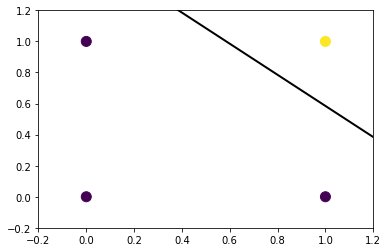

In [10]:
plt.scatter(x[:,0],x[:,1], c=y, s=100, cmap='viridis')
plt.plot(plotx, ploty, color='k', linewidth=2)
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
plt.show()

## El mismo, pero con TF

Ahora vamos a crear el mismo perceptron aprovechando que ya lo conocemos, para familiarizarnos con la nomeclatura de TensorFlow.

En el camino hablaremos de:

* Placeholders
* Variables (si, otro tipo variables más... nadie dijo que TF fuese sencillo)
* Sesiones
* Inicializadores
* so for so on

In [11]:
# X e y nos valen de la parte superior. A y le tenemos que aplicar una pequeña modificación.
x = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32) # 4x2
y = np.array([0, 0, 1, 0], np.float32) # 4
y = np.reshape(y, [4,1]) 

En tensorflow tenemos que crear un place holder incial para pasar los valores de X e y

In [12]:
X = tf.placeholder(tf.float32, shape=[4,2])
Y = tf.placeholder(tf.float32, shape=[4,1])

In [13]:
W = tf.Variable(tf.zeros([NUM_FEATURES, 1]), tf.float32)
B = tf.Variable(tf.zeros([1, 1]), tf.float32)

In [14]:
yH = tf.sigmoid( tf.add( tf.matmul(X, W), B) )
err = Y - yH

dW = tf.matmul( tf.transpose(X), err)
dB = tf.reduce_sum(err, 0)

_W = W + LR * dW
_B = B + LR * dB

In [15]:
step = tf.group(W.assign(_W), B.assign(_B)) # actualiza pesos

In [16]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [17]:
for k in range(NUM_ITER):
    sess.run([step], feed_dict={X: x, Y: y})

W: [2.6895783 2.6895783]
b: -4.26431
y: [[0.]
 [0.]
 [1.]
 [0.]]


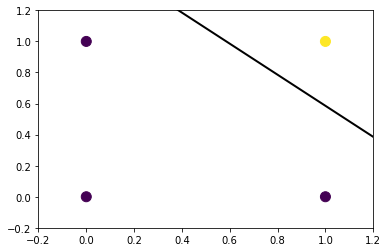

In [18]:
W = np.squeeze(sess.run(W))
b = np.squeeze(sess.run(B))

# Now plot the fitted line. We need only two points to plot the line
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = - 1 / W[1] * (W[0] * plot_x + b)
plot_y = np.reshape(plot_y, [2, -1])
plot_y = np.squeeze(plot_y)

print('W: ' + str(W))
print('b: ' + str(b))

y = np.reshape(y, [4]) 

plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]) 
plt.ylim([-0.2, 1.2])
plt.show()